/home/vscode/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


Data Drift Detection Results:
Age: No Drift
Salary: No Drift

Data Quality Checks Results:
Missing Values: Series([], dtype: int64)
Duplicates: 0
Outliers: 0


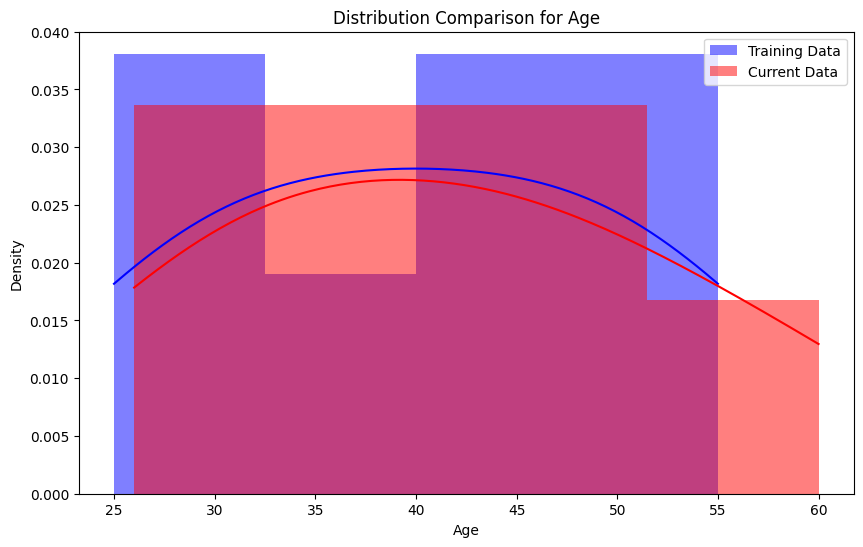

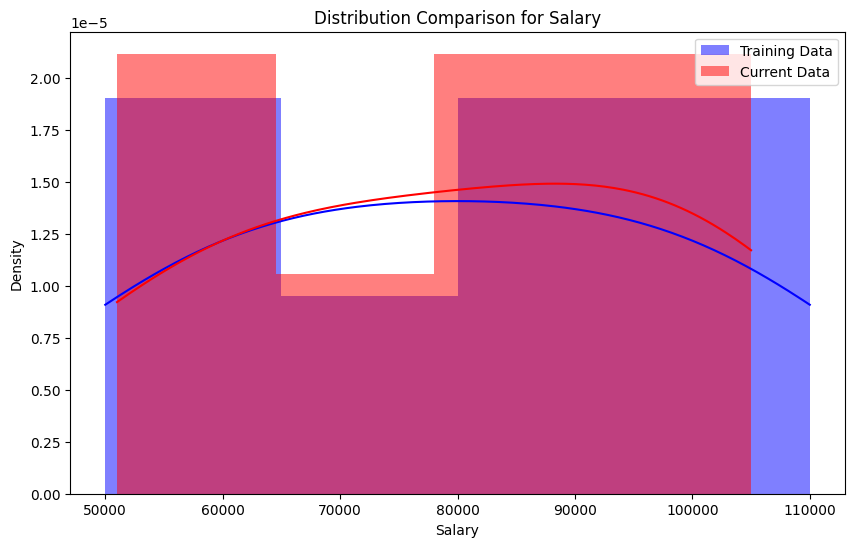

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Sample data for training and current dataset
train_data = {
    'Age': [25, 30, 35, 40, 45, 50, 55],
    'Salary': [50000, 60000, 70000, 80000, 90000, 100000, 110000]
}

current_data = {
    'Age': [26, 31, 36, 41, 46, 51, 60],
    'Salary': [51000, 61000, 71000, 81000, 91000, 101000, 105000]
}

train_df = pd.DataFrame(train_data)
current_df = pd.DataFrame(current_data)

# Step 1: Detect Data Drift using KS-test (Kolmogorov-Smirnov test)
def detect_data_drift(train_df, current_df):
    drift_results = {}
    
    # Loop through columns in the training data
    for column in train_df.columns:
        # Perform KS-test to compare distributions of train and current data
        statistic, p_value = ks_2samp(train_df[column], current_df[column])
        
        # If p_value < 0.05, it indicates significant drift
        drift_results[column] = "Drift Detected" if p_value < 0.05 else "No Drift"
    
    return drift_results

# Step 2: Data Quality Checks
def data_quality_checks(df):
    quality_issues = {}
    
    # Check for missing values
    missing_values = df.isnull().sum()
    quality_issues['Missing Values'] = missing_values[missing_values > 0]
    
    # Check for duplicate rows
    duplicates = df.duplicated().sum()
    quality_issues['Duplicates'] = duplicates
    
    # Check for outliers using Z-score
    z_scores = np.abs((df - df.mean()) / df.std())
    outliers = (z_scores > 3).sum()
    quality_issues['Outliers'] = outliers.sum()
    
    return quality_issues

# Step 3: Visualize the Drift (Optional)
def visualize_drift(train_df, current_df):
    # Visualize histograms for each column to compare distributions
    for column in train_df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(train_df[column], color='blue', label='Training Data', kde=True, stat='density', linewidth=0)
        sns.histplot(current_df[column], color='red', label='Current Data', kde=True, stat='density', linewidth=0)
        plt.title(f'Distribution Comparison for {column}')
        plt.legend()
        plt.show()

# Step 4: Execute Drift Detection and Data Quality Checks
drift_results = detect_data_drift(train_df, current_df)
quality_issues = data_quality_checks(current_df)

# Display the results
print("Data Drift Detection Results:")
for feature, drift in drift_results.items():
    print(f"{feature}: {drift}")

print("\nData Quality Checks Results:")
for issue, count in quality_issues.items():
    print(f"{issue}: {count}")

# Visualize Drift
visualize_drift(train_df, current_df)
